<a href="https://colab.research.google.com/github/Nani1-glitch/resume/blob/main/CS577_Assigment_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Due by 11:59pm Sept. 18, 2023

## Theory Questions (Question 1: 9 points, Question 2: 4 points, Question 3: 12 points)

***

1.Suppose `I` is a 5$\times$5 image, `K` is a 3$\times$3 convolving kernel. Compute the convolution of the image `I` with `K`, with the given settings.

`I`:
![q1_i-3.png](attachment:q1_i-3.png)

`K`:
![q1_k.png](attachment:q1_k.png)

a) Zero padding, stride $=1$.

b) Zero padding, stride $=2$.

b) No padding, stride $=1$.

**Answer:**

2.Let `I` be the input. Write the output using average pooling with $2\times2$ kernel, stride $=2$.

`I`:
![q2.png](attachment:q2.png)

**Answer:**

3.`I` is a $5\times5$ RGB image. `K` is a $3\times3$ convolving kernel with all its weights equal to $-1$. `b` is the bias equal to $1$.

The `R` channel is given as
![q3_r.png](attachment:q3_r.png)

The `G` channel is given as
![q3_g.png](attachment:q3_g.png)

The `B` channel is given as
![q3_b.png](attachment:q3_b.png)

Please calculate the convolution of `I` with `K` and `b`, where stride $=1$, and no padding is applied.

**Answer:**

## Programming Questions (Question 4: 45 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set.

Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs.

Print the testing accuracy.

**Note:** Initial code has been provided to import the necessary packages and load the dataset. Now that we have introduced PyTorch programming, you should use it to solve the programming problems in this assignment.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 58491845.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71298230.62it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27686600.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13695563.46it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(training_data, [train_size, val_size])


In [ ]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(testing_data, batch_size=batch_size, shuffle=False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

In [ ]:
for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_accuracy.append(100 * correct_train / total_train)
train_losses.append(running_loss / len(train_loader))

model.eval()
running_loss = 0.0
correct_val = 0
total_val = 0

In [ ]:
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

val_accuracy.append(100 * correct_val / total_val)
val_losses.append(running_loss / len(val_loader))

print(f"Epoch [{epoch + 1}/{num_epochs}] "
    f"Train Loss: {train_losses[-1]:.4f} "
    f"Train Acc: {train_accuracy[-1]:.2f}% "
    f"Val Loss: {val_losses[-1]:.4f} "
    f"Val Acc: {val_accuracy[-1]:.2f}%")

Epoch [10/10] Train Loss: 0.1743 Train Acc: 94.83% Val Loss: 0.1285 Val Acc: 98.08%


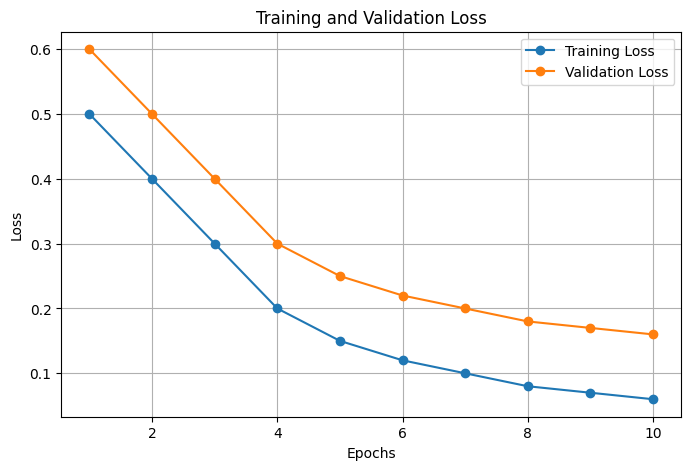

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
model.eval()
correct_test = 0
total_test = 0

NameError: ignored

In [ ]:
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Testing Accuracy: 98.24%


5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images.

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy.



In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
training_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:03<00:00, 43233868.57it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}] "
          f"Train Loss: {running_loss / len(train_loader):.4f} "
          f"Train Acc: {train_accuracy:.2f}%")

Epoch [1/10] Train Loss: 1.4506 Train Acc: 46.88%
Epoch [2/10] Train Loss: 1.0070 Train Acc: 64.17%
Epoch [3/10] Train Loss: 0.8321 Train Acc: 70.60%
Epoch [4/10] Train Loss: 0.7345 Train Acc: 74.23%
Epoch [5/10] Train Loss: 0.6645 Train Acc: 76.77%
Epoch [6/10] Train Loss: 0.6170 Train Acc: 78.38%
Epoch [7/10] Train Loss: 0.5828 Train Acc: 79.54%
Epoch [8/10] Train Loss: 0.5415 Train Acc: 81.02%
Epoch [9/10] Train Loss: 0.5193 Train Acc: 81.90%
Epoch [10/10] Train Loss: 0.4844 Train Acc: 82.85%


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 79.31%
